#**<center> <h1>Desarrollo proyecto ciencia de datos</h1> </center>**
<center><img src="https://i0.wp.com/strixus.com/wp-content/uploads/softserve.png?w=1024&ssl=1" width="300"></center>
<center> <t>German Antonio Fuentes,Eduardo, Juan David García.<t> </center>



<h2> Comentarios </h2>

Esta zona se encargara de anotar las tareas pendientes que tenemos que ver para el desarrollo del proyecto.

-Se hablo que :

1. *Tipo de Datos:*
   - Asegúrate de que las columnas tienen el tipo de datos correcto. Por ejemplo, las fechas deberían ser del tipo datetime, y las columnas numéricas deberían ser del tipo int o float según corresponda.

2. *Datos Faltantes:*
   - Observo que hay algunas columnas con datos faltantes (como fechaexpedicion, fechainactivo, unidadreferencia, etc.). Puedes considerar estrategias para manejar estos valores faltantes, como la imputación o eliminación de filas/columnas según sea necesario.

3. *Análisis Exploratorio de Datos (EDA):*
   - Realiza un análisis exploratorio de datos para obtener información sobre la distribución de valores, valores atípicos, etc.
   - Puedes usar herramientas como gráficos de histogramas, diagramas de caja y dispersión para explorar los datos.

4. *Fecha de Expiración y Fecha de Activación:*
   - Puedes calcular la duración de los medicamentos restando la fechaexpedicion de la fechavencimiento. Esto podría ser útil para entender la vida útil de los medicamentos.

5. *Categorización y Agrupación:*
   - Considera la posibilidad de categorizar algunas columnas, como viaadministracion, formafarmaceutica, tiporol, etc. Esto facilitará el análisis y la visualización de datos.

6. *Exploración de Atípicos:*
   - Investiga si hay valores atípicos en las columnas numéricas. Estos pueden afectar el rendimiento de algunos algoritmos y modelos.

7. *Construcción de Características (Feature Engineering):*
   - Puedes crear nuevas columnas a partir de las existentes si eso agrega valor al análisis o a los modelos que puedas construir.

8. *Visualización de Datos:*
   - Utiliza gráficos y visualizaciones para comunicar los patrones y las tendencias en los datos. Puedes usar bibliotecas como Matplotlib y Seaborn para esto.

9. *Preparación de Datos para Modelos:*
   - Si planeas construir modelos predictivos, asegúrate de que los datos estén preparados adecuadamente. Esto podría incluir la codificación de variables categóricas y la normalización de variables numéricas.

10. *Exploración de Datos IUM:*
   - La columna IUM tiene muchos valores nulos. Examina si puedes imputar estos valores o si necesitas realizar algún análisis específico para estas entradas.

11. *Seguridad y Privacidad:*
   - Dado que estos datos pueden estar relacionados con la salud, es crucial asegurar la privacidad y cumplir con las regulaciones de protección de datos.

Una vez que hayas explorado y preparado los datos, podrías considerar la posibilidad de construir modelos predictivos, realizar análisis de tendencias, o incluso desarrollar una aplicación que permita a los usuarios explorar la información sobre medicamentos de manera interactiva.



Preguntas.

1. ¿ Podemos vincular un JSON a COLAB para traerlo directamente desde la base de datos?

2.  Vincular el drive con el colab en la misma carpeta de los 3 para que no toque cargar el programa

3. Saber que es la concentración en los medicamentos, las letras para clasificar con ellas

4. Como tratar con los datos Nan, que hacer con ellos o como clasificar






# <center> <h1> Información necesaria para el programa </h1>


In [72]:
from pathlib import Path
import pandas as pd
import numpy as np
import csv
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt

#import pandas_profiling


In [73]:
#/content/drive/MyDrive/Softserve/PythonCrashCourse/Medicamentos.csv

df = pd.read_csv('Medicamentos.csv')



In [ ]:
#df.load("modalidad")

In [74]:
#Observación de cabezera
df.head(5)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
0,24780,BETARRETIN® LOCION,MEGALABS COLOMBIA S.A.S.,INVIMA 2023M-007851-R4,10/28/1996,07/24/2028,Vigente,24780,2,30.0,...,D,ACIDO RETINOICO (TRETINOINA),g,0.05,100 ML,LOCION,ALTEA FARMACEUTICA S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
1,24780,BETARRETIN® LOCION,MEGALABS COLOMBIA S.A.S.,INVIMA 2023M-007851-R4,10/28/1996,07/24/2028,Vigente,24780,3,120.0,...,D,ACIDO RETINOICO (TRETINOINA),g,0.05,100 ML,LOCION,ALTEA FARMACEUTICA S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
2,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,MERCK S.A.,IMPORTADOR,IMPORTAR Y VENDER,NaN
3,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,PROCTER & GAMBLE COLOMBIA LTDA,IMPORTADOR,IMPORTAR Y VENDER,NaN
4,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,SOFARIMEX INDS QUIMICA E FARMACEUTICA S.A,FABRICANTE,IMPORTAR Y VENDER,NaN


In [76]:
df.shape

(114930, 29)

In [82]:
print(f"Se tiene {df.shape[0]} filas y {df.shape[-1]} columnas en el data set de medicamentos")

Se tiene 114930 filas y 29 columnas en el data set de medicamentos


In [80]:
# Se tiene en total

print(f"Se tiene en total {df.size} elementos en la base de datos")

Se tiene en total 3332970 elementos en la base de datos


In [83]:
# Ver el numero de nulos en la base de datos

df.isnull().sum()

expediente                  0
producto                    0
titular                     0
registrosanitario           0
fechaexpedicion           116
fechavencimiento            0
estadoregistro              0
expedientecum               0
consecutivocum              0
cantidadcum                 0
descripcioncomercial       14
estadocum                   0
fechaactivo                 0
fechainactivo           92826
muestramedica               0
unidad                      0
atc                         0
descripcionatc              0
viaadministracion           0
concentracion               0
principioactivo             0
unidadmedida                0
cantidad                    0
unidadreferencia         1832
formafarmaceutica           0
nombrerol                   0
tiporol                     0
modalidad                   0
IUM                     97716
dtype: int64

In [84]:
df.isna().sum()

expediente                  0
producto                    0
titular                     0
registrosanitario           0
fechaexpedicion           116
fechavencimiento            0
estadoregistro              0
expedientecum               0
consecutivocum              0
cantidadcum                 0
descripcioncomercial       14
estadocum                   0
fechaactivo                 0
fechainactivo           92826
muestramedica               0
unidad                      0
atc                         0
descripcionatc              0
viaadministracion           0
concentracion               0
principioactivo             0
unidadmedida                0
cantidad                    0
unidadreferencia         1832
formafarmaceutica           0
nombrerol                   0
tiporol                     0
modalidad                   0
IUM                     97716
dtype: int64

In [86]:
df["fechaexpedicion"].isnull().sum()

116

In [87]:
#Visualización de archivos nulos
df[df["fechaexpedicion"].isnull()]

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
2869,20099719,AMOXOLQRP®,QUIRUPOS S.A.S.,INVIMA 2022M-0017352-R1,NaN,08/05/2027,Vigente,20099719,19,3000.0,...,A,AMOXICILINA TRIHIDRATO EQUIVALENTE A,mg,500.0,CAPSULA,CAPSULA DURA,SYNTOFARMA S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
3174,20156998,TRELEGY ELLIPTA 100MCG/62.5MCG/25MCG POLVO PAR...,GLAXOSMITHKLINE COLOMBIA S A,INVIMA 2019M-0019227,NaN,09/03/2024,Vigente,20156998,2,1.0,...,A,FUROATO DE FLUTICASONA MICRONIZADO,mcg,100.0,CADA DOSIS,POLVO PARA INHALACION,GLAXO OPERATIONS UK LIMITED (BAJO EL NOMBRE CO...,FABRICANTE,IMPORTAR Y VENDER,2B1030411000101
4541,20097936,IRBEVITAE® 150 MG COMPRIMIDOS RECUBIERTOS.,GALENICUM HEALTH COLOMBIA S.A.S,INVIMA 2021M-0017947-R1,NaN,12/26/2026,Vigente,20097936,11,7.0,...,A,IRBESARTAN,mg,150.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,ATLANTIC PHARMA- PRODUÇÕES FARMACÊUTICAS S.A.,FABRICANTE,IMPORTAR Y VENDER,NaN
4887,20099719,AMOXOLQRP®,QUIRUPOS S.A.S.,INVIMA 2022M-0017352-R1,NaN,08/05/2027,Vigente,20099719,2,60.0,...,A,AMOXICILINA TRIHIDRATO EQUIVALENTE A,mg,500.0,CAPSULA,CAPSULA DURA,SYNTOFARMA S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
5291,20156999,TRIMEDAT 75MG,LABORATORIOS MINTLAB S.A.S.,INVIMA 2019M 19439,NaN,12/09/2024,Vigente,20156999,1,10.0,...,A,CLOPIDOGREL BISULFATO 99 MG EQUIVALENTE A CLOP...,mg,75.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,IND-SWIFT LIMITED.,FABRICANTE,IMPORTAR Y VENDER,1C1022071003100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111205,20099136,ERITROMICINA TABLETAS RECUBIERTAS X 500 MG.,GENFAR S.A.,INVIMA 2022M-0017370-R1,NaN,09/29/2027,Vigente,20099136,15,210.0,...,A,ERITROMICINA ESTEARATO EQUIVALENTE A ERITROMIC...,mg,500.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,FAREVA VILLA RICA S.A.S.,FABRICANTE,FABRICAR Y VENDER,NaN
111407,20099136,ERITROMICINA TABLETAS RECUBIERTAS X 500 MG.,GENFAR S.A.,INVIMA 2022M-0017370-R1,NaN,09/29/2027,Vigente,20099136,14,100.0,...,A,ERITROMICINA ESTEARATO EQUIVALENTE A ERITROMIC...,mg,500.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,FAREVA VILLA RICA S.A.S.,FABRICANTE,FABRICAR Y VENDER,NaN
112580,20099136,ERITROMICINA TABLETAS RECUBIERTAS X 500 MG.,GENFAR S.A.,INVIMA 2022M-0017370-R1,NaN,09/29/2027,Vigente,20099136,4,12.0,...,A,ERITROMICINA ESTEARATO EQUIVALENTE A ERITROMIC...,mg,500.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,FAREVA VILLA RICA S.A.S.,FABRICANTE,FABRICAR Y VENDER,1E1040991000102
112888,20097936,IRBEVITAE® 150 MG COMPRIMIDOS RECUBIERTOS.,GALENICUM HEALTH COLOMBIA S.A.S,INVIMA 2021M-0017947-R1,NaN,12/26/2026,Vigente,20097936,1,14.0,...,A,IRBESARTAN,mg,150.0,TABLETA RECUBIERTA,TABLETA RECUBIERTA,GALENICUM HEALTH COLOMBIA S.A.S,IMPORTADOR,IMPORTAR Y VENDER,NaN


In [ ]:
#Entrar a una columna especifica

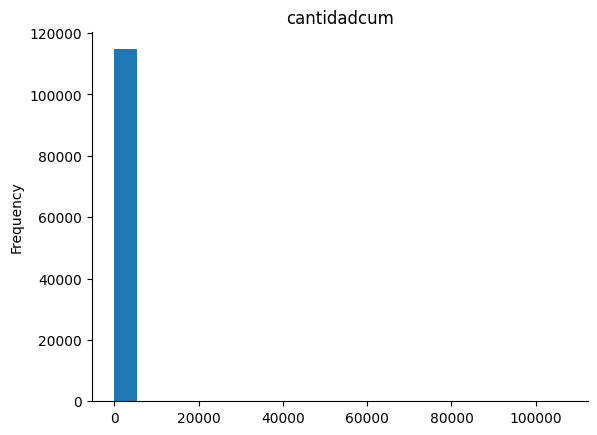

In [79]:
from matplotlib import pyplot as plt
df['cantidadcum'].plot(kind='hist', bins=20, title='cantidadcum')
plt.gca().spines[['top', 'right',]].set_visible(False)

<h3> Observación de los titulos de las columnas a operar </h3>

In [41]:
df.columns.values

array(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro',
       'expedientecum', 'consecutivocum', 'cantidadcum',
       'descripcioncomercial', 'estadocum', 'fechaactivo',
       'fechainactivo', 'muestramedica', 'unidad', 'atc',
       'descripcionatc', 'viaadministracion', 'concentracion',
       'principioactivo', 'unidadmedida', 'cantidad', 'unidadreferencia',
       'formafarmaceutica', 'nombrerol', 'tiporol', 'modalidad', 'IUM'],
      dtype=object)

<h1> Verificación de datos utilizado </h1>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114930 entries, 0 to 114929
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   expediente            114930 non-null  int64  
 1   producto              114930 non-null  object 
 2   titular               114930 non-null  object 
 3   registrosanitario     114930 non-null  object 
 4   fechaexpedicion       114814 non-null  object 
 5   fechavencimiento      114930 non-null  object 
 6   estadoregistro        114930 non-null  object 
 7   expedientecum         114930 non-null  int64  
 8   consecutivocum        114930 non-null  int64  
 9   cantidadcum           114930 non-null  float64
 10  descripcioncomercial  114916 non-null  object 
 11  estadocum             114930 non-null  object 
 12  fechaactivo           114930 non-null  object 
 13  fechainactivo         22104 non-null   object 
 14  muestramedica         114930 non-null  object 
 15  

In [32]:
#Mejorar dats de fecha de expedicion

df_nuevo = df.fillna(value="fechaexpedicion")




In [53]:
df['fechaactivo'] = pd.to_datetime(df['fechaactivo'], format="%m/%d/%Y")
df['fechainactivo'] = pd.to_datetime(df['fechainactivo'], format="%m/%d/%Y")
#df['fechaexpedicion'] = pd.to_datetime(df['fechaexpedicion'], format="%m/%d/%Y")
df['fechavencimiento'] = pd.to_datetime(df['fechavencimiento'], format="%m/%d/%Y")

#Se tiene un problema con el formato de fecha de expedición ya que no deja se eliminar las que estan causando conflicto

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114930 entries, 0 to 114929
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   expediente            114930 non-null  int64         
 1   producto              114930 non-null  object        
 2   titular               114930 non-null  object        
 3   registrosanitario     114930 non-null  object        
 4   fechaexpedicion       114814 non-null  object        
 5   fechavencimiento      114930 non-null  datetime64[ns]
 6   estadoregistro        114930 non-null  object        
 7   expedientecum         114930 non-null  int64         
 8   consecutivocum        114930 non-null  int64         
 9   cantidadcum           114930 non-null  float64       
 10  descripcioncomercial  114916 non-null  object        
 11  estadocum             114930 non-null  object        
 12  fechaactivo           114930 non-null  datetime64[ns]
 13 

In [68]:
df_data = pd.DataFrame(df)
df_data['fechavencimiento'] = pd.to_datetime(df_data['fechavencimiento'])
dc= df_data.head(10)

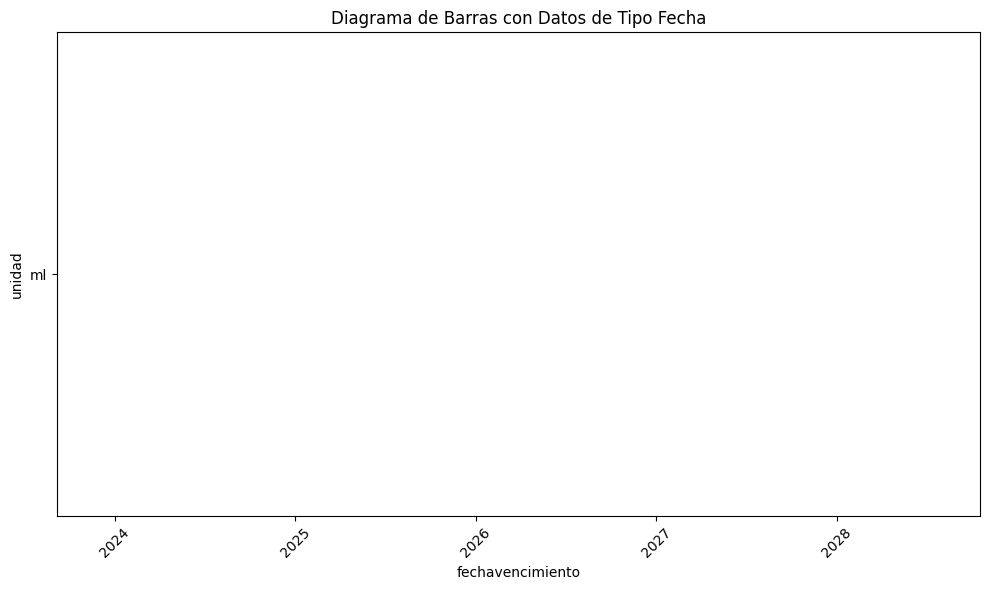

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(dc['fechavencimiento'], dc['unidad'], color='skyblue')
plt.xlabel('fechavencimiento')
plt.ylabel('unidad')
plt.title('Diagrama de Barras con Datos de Tipo Fecha')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

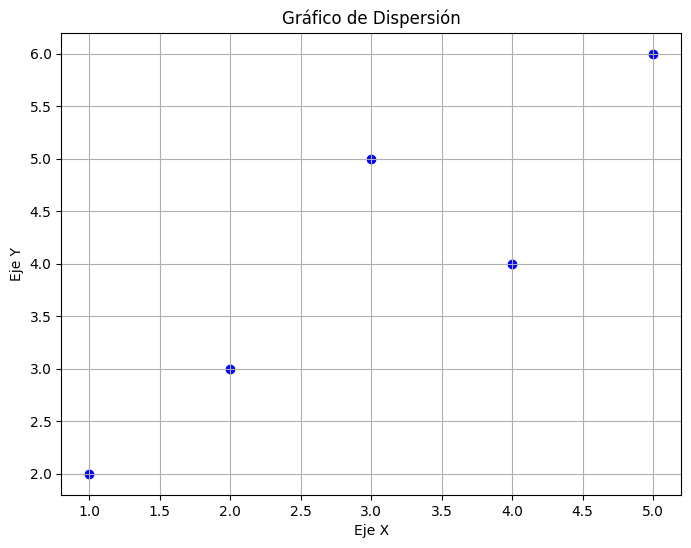

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con datos de dispersión
data = {'X': [1, 2, 3, 4, 5],
        'Y': [2, 3, 5, 4, 6]}

df = pd.DataFrame(data)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(dc['X'], dc['Y'], color='blue', marker='o')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión')
plt.grid(True)

# Mostrar el gráfico
plt.show()


<h3> Cambio de typo de formato de las fechas</h3>


In [56]:
pd.unique(df['IUM'])



array([nan, '1H1008261007100', '1E1042951001100', ..., '1E1004851011104',
       '1E1005361001100', '1L1005321000101'], dtype=object)

In [57]:
#Se remplazo los NaN por el valor SinCodigo
df_nuevo = df.fillna(value="SinCodigo")

In [58]:
df_nuevo.tail()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
114925,20077141,DROSPERA® 20,EXELTIS S.A.S,INVIMA 2022M-0016961-R1,04/06/2016,2027-06-21,Vigente,20077141,11,28.0,...,A,ETINILESTRADIOL MICRONIZADO,mg,0.02,TABLETA RECUBIERTA CON PELÍCULA,TABLETA CUBIERTA CON PELICULA,EXELTIS S.A.S,IMPORTADOR,IMPORTAR Y VENDER,SinCodigo
114926,19979152,TIAMAX® 200,MEGALABS COLOMBIA S.A.S.,INVIMA 2021M-0007633-R1,12/13/2007,2026-08-17,Vigente,19979152,2,15.0,...,A,QUETIAPINA FUMARATO EQUIVALENTE A QUETIAPINA,mg,200.00,TABLETA RECUBIERTA,TABLETA RECUBIERTA,MEGA LABS S.A,FABRICANTE,IMPORTAR Y VENDER,SinCodigo
114927,20174437,ALERNESS® SOLUCION ORAL,TECNOFAR TQ S.A.S,INVIMA 2020M-0019797,08/24/2020,2025-09-08,Vigente,20174437,2,1.0,...,B,LEVOCETIRIZINA DICLORHIDRATO,g,0.10,100 ML DE SOLUCIÓN ORAL,SOLUCION ORAL,TECNOFAR TQ S.A.S,FABRICANTE,FABRICAR Y VENDER,SinCodigo
114928,19937061,NORAVER- G CONTRA LOS SINTOMAS DE LA GRIPA,TECNOQUIMICAS S.A.,INVIMA 2023M-0002622-R2,07/25/2003,2028-08-22,Vigente,19937061,58,4.0,...,A,EXCESO 6.0%,mg,0.20,CAPSULA DURA,CAPSULA DURA,TECNOQUIMICAS S.A. PLANTA JAMUNDI,FABRICANTE,IMPORTAR. SEMIELABORAR Y VENDER,2C1046061000121
114929,19942561,LACTATO DE RINGER SOLUCION INYECTABLE (SOLUCIO...,FRESENIUS KABI COLOMBIA S.A.S,INVIMA 2022M-0003574-R2,07/17/2004,2027-06-28,Vigente,19942561,8,1.0,...,C,LACTATO DE SODIO,mg,310.00,100 ML DE SOLUCIÓN INYECTABLE,SOLUCION INYECTABLE,FRESENIUS MEDICAL CARE ANDINA S.A.S.,FABRICANTE,FABRICAR Y VENDER,SinCodigo


In [59]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114930 entries, 0 to 114929
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   expediente            114930 non-null  int64         
 1   producto              114930 non-null  object        
 2   titular               114930 non-null  object        
 3   registrosanitario     114930 non-null  object        
 4   fechaexpedicion       114930 non-null  object        
 5   fechavencimiento      114930 non-null  datetime64[ns]
 6   estadoregistro        114930 non-null  object        
 7   expedientecum         114930 non-null  int64         
 8   consecutivocum        114930 non-null  int64         
 9   cantidadcum           114930 non-null  float64       
 10  descripcioncomercial  114930 non-null  object        
 11  estadocum             114930 non-null  object        
 12  fechaactivo           114930 non-null  datetime64[ns]
 13 

In [60]:
df_nuevo['fechainactivo'] = pd.to_datetime(df_nuevo['fechainactivo'], format="%m/%d/%Y")

ValueError: time data "SinCodigo" doesn't match format "%m/%d/%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<h1> Los datos se encuentran en sus parametros correctos </h1>

In [24]:
#Eliminando la ultima columna

df.drop(['IUM'], axis=1)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,viaadministracion,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
0,24780,BETARRETIN® LOCION,MEGALABS COLOMBIA S.A.S.,INVIMA 2023M-007851-R4,10/28/1996,07/24/2028,Vigente,24780,2,30.0,...,TOPICA (EXTERNA),D,ACIDO RETINOICO (TRETINOINA),g,0.05,100 ML,LOCION,ALTEA FARMACEUTICA S.A.,FABRICANTE,FABRICAR Y VENDER
1,24780,BETARRETIN® LOCION,MEGALABS COLOMBIA S.A.S.,INVIMA 2023M-007851-R4,10/28/1996,07/24/2028,Vigente,24780,3,120.0,...,TOPICA (EXTERNA),D,ACIDO RETINOICO (TRETINOINA),g,0.05,100 ML,LOCION,ALTEA FARMACEUTICA S.A.,FABRICANTE,FABRICAR Y VENDER
2,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,INHALACION,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,MERCK S.A.,IMPORTADOR,IMPORTAR Y VENDER
3,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,INHALACION,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,PROCTER & GAMBLE COLOMBIA LTDA,IMPORTADOR,IMPORTAR Y VENDER
4,29916,NASIVIN® 0.05 % ADULTOS,PROCTER & GAMBLE COLOMBIA LTDA,INVIMA 2018M-001160-R4,09/29/1998,11/30/2023,Vigente,29916,3,375.0,...,INHALACION,C,OXIMETAZOLINA CLORHIDRATO,mg,0.50,ML,SOLUCIONNASAL,SOFARIMEX INDS QUIMICA E FARMACEUTICA S.A,FABRICANTE,IMPORTAR Y VENDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114925,20077141,DROSPERA® 20,EXELTIS S.A.S,INVIMA 2022M-0016961-R1,04/06/2016,06/21/2027,Vigente,20077141,11,28.0,...,ORAL,A,ETINILESTRADIOL MICRONIZADO,mg,0.02,TABLETA RECUBIERTA CON PELÍCULA,TABLETA CUBIERTA CON PELICULA,EXELTIS S.A.S,IMPORTADOR,IMPORTAR Y VENDER
114926,19979152,TIAMAX® 200,MEGALABS COLOMBIA S.A.S.,INVIMA 2021M-0007633-R1,12/13/2007,08/17/2026,Vigente,19979152,2,15.0,...,ORAL,A,QUETIAPINA FUMARATO EQUIVALENTE A QUETIAPINA,mg,200.00,TABLETA RECUBIERTA,TABLETA RECUBIERTA,MEGA LABS S.A,FABRICANTE,IMPORTAR Y VENDER
114927,20174437,ALERNESS® SOLUCION ORAL,TECNOFAR TQ S.A.S,INVIMA 2020M-0019797,08/24/2020,09/08/2025,Vigente,20174437,2,1.0,...,ORAL,B,LEVOCETIRIZINA DICLORHIDRATO,g,0.10,100 ML DE SOLUCIÓN ORAL,SOLUCION ORAL,TECNOFAR TQ S.A.S,FABRICANTE,FABRICAR Y VENDER
114928,19937061,NORAVER- G CONTRA LOS SINTOMAS DE LA GRIPA,TECNOQUIMICAS S.A.,INVIMA 2023M-0002622-R2,07/25/2003,08/22/2028,Vigente,19937061,58,4.0,...,ORAL,A,EXCESO 6.0%,mg,0.20,CAPSULA DURA,CAPSULA DURA,TECNOQUIMICAS S.A. PLANTA JAMUNDI,FABRICANTE,IMPORTAR. SEMIELABORAR Y VENDER
